# EXPLORATORY DATA ANALYSIS

In [1]:
from common_functions import * 
from forecasters import *

### Automated Detrending of exogoneous regressors
using Augmented-Dickey-Fuller-Test

In [2]:
TARGET_VARIABLE = "SUM(FATALITIES)"
TARGET_COUNTRY = "MLI"
SEASONAL_PERIODICITY = 12 # for data frequency & seasonality S

SEASONALITY = True
NEIGHBORS = True
SOCIO_ECO_VARS = True # X
N_LAGS_X = 1
DIM_REDUCTION_METHOD = "PCA"

In [3]:
### GET DATA
y, X = getData(target_variable = TARGET_VARIABLE, 
               target_country = TARGET_COUNTRY, 
               predictor_countries = ["BFA"],
               socio_eco_vars = SOCIO_ECO_VARS,
               n_lags_X = N_LAGS_X, 
               seasonal_periodicity = SEASONAL_PERIODICITY)

Getting Data for MLI
IMF, WB, ACLED loaded
adjusting y for lags
adjusting X for lags
GET DATA finished.
X: (301, 99)
y: (301, 1)
------------------------------------------------


In [5]:
y

,SUM(FATALITIES)_MLI
MONTH,
1997-02,0.000000
1997-03,0.000000
1997-04,0.000000
1997-05,0.000000
1997-06,1.098612
...,...
2021-10,5.241747
2021-11,4.624973
2021-12,5.262690


In [4]:
y.diff(1)

,SUM(FATALITIES)_MLI
MONTH,
1997-02,NaN
1997-03,0.000000
1997-04,0.000000
1997-05,0.000000
1997-06,1.098612
...,...
2021-10,0.541267
2021-11,-0.616774
2021-12,0.637717


### Differencing as Data Transformation in Model Pipeline

In [4]:
### SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(y=y,
                                                    X=X, 
                                                    forecast_horizon=SEASONAL_PERIODICITY)
# Model fit
model = TimeSeriesForecasterPCA_LinInt()
# print(model)
fitted_model = model.fit(X_train, y_train, (5, (1,1,1), (1,1,1,12), "n"))

# print(model)
# print(fitted_model)
# prediction
prediction_results, conf_int = model.predict(X_test, SEASONAL_PERIODICITY, ci=True)

PREDICTION#################################
         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2021-03               4.262680                2.639057   
2021-04               4.672829                2.484907   
2021-05               5.176150                3.258097   
2021-06               5.111988                2.484907   
2021-07               5.257495                3.761200   
2021-08               5.056246                2.833213   
2021-09               4.962845                2.397895   
2021-10               5.568345                2.302585   
2021-11               5.293305                3.610918   
2021-12               5.438079                2.484907   
2022-01               5.501258                3.091042   
2022-02               5.278115                2.833213   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2021-03                

In [5]:
X

,NUMBER_EVENTS_BFA_T-1,SUM(COUNT_PRO)_BFA_T-1,SUM(COUNT_SRZ)_BFA_T-1,SUM(COUNT_STRA)_BFA_T-1,SUM(FATALITIES)_BFA_T-1,SUM(FATALITIES_PRO)_BFA_T-1,SUM(FATALITIES_SRZ)_BFA_T-1,SUM(FATALITIES_STRA)_BFA_T-1,IMF_BCA_MLI_T-1,IMF_BCA_NGDPD_MLI_T-1,...,WB_REGULATORY_QUALTIY_ESTIMATE_MLI_T-1,WB_RESEARCH_AND_DEVELOPMENT_MLI_T-1,WB_RULE_OF_LAW_ESTIMATE_MLI_T-1,WB_SCHOOL_ENROLLMENT_PRIMARY_MLI_T-1,WB_SCHOOL_ENROLMENT_PRIMARY_MLI_T-1,WB_TOTAL_GREENHOUSE_GAS_MLI_T-1,WB_TOTAL_NATURAL_RESOURCES_MLI_T-1,WB_TOTAL_TAX_RATE_MLI_T-1,WB_UNEMPLOYMENT_YOUTH_MALE_MLI_T-1,WB_VOICE_ACCOUNTABILITY_ESTIMATE_MLI_T-1
MONTH,,,,,,,,,,,,,,,,,,,,,
1997-02,1.609438,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,-0.18,-5.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.18,-5.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.18,-5.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.18,-5.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-06,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.18,-5.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
conf_int

SUM(FATALITIES)_MLI,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-03,5.523117,0.963244,3.938723,7.107512
2021-04,5.548686,0.970555,3.952266,7.145107
2021-05,5.676943,0.970779,4.080154,7.273732
2021-06,6.026546,0.970796,4.429728,7.623364
2021-07,5.573010,0.970798,3.976189,7.169831
2021-08,5.698028,0.970799,4.101207,7.294850
2021-09,5.570919,0.970799,3.974098,7.167741
2021-10,5.607482,0.970799,4.010660,7.204304
2021-11,5.508618,0.970799,3.911795,7.105441
2021-12,5.514950,0.970805,3.918117,7.111782


In [7]:
mask = np.logical_or(X_train.columns.str.startswith("WB_"), X_train.columns.str.startswith("IMF_"))
mask
X_train.loc[:,mask]

,IMF_BCA_MLI_T-1,IMF_BCA_NGDPD_MLI_T-1,IMF_GGR_MLI_T-1,IMF_GGR_NGDP_MLI_T-1,IMF_GGX_MLI_T-1,IMF_GGXCNL_MLI_T-1,IMF_GGXCNL_NGDP_MLI_T-1,IMF_GGXONLB_MLI_T-1,IMF_GGXONLB_NGDP_MLI_T-1,IMF_GGXWDG_MLI_T-1,...,WB_REGULATORY_QUALTIY_ESTIMATE_MLI_T-1,WB_RESEARCH_AND_DEVELOPMENT_MLI_T-1,WB_RULE_OF_LAW_ESTIMATE_MLI_T-1,WB_SCHOOL_ENROLLMENT_PRIMARY_MLI_T-1,WB_SCHOOL_ENROLMENT_PRIMARY_MLI_T-1,WB_TOTAL_GREENHOUSE_GAS_MLI_T-1,WB_TOTAL_NATURAL_RESOURCES_MLI_T-1,WB_TOTAL_TAX_RATE_MLI_T-1,WB_UNEMPLOYMENT_YOUTH_MALE_MLI_T-1,WB_VOICE_ACCOUNTABILITY_ESTIMATE_MLI_T-1
MONTH,,,,,,,,,,,,,,,,,,,,,
1997-02,-0.180,-5.607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03,-0.180,-5.607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04,-0.180,-5.607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05,-0.180,-5.607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-06,-0.180,-5.607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10,-0.403,-2.304,2083.395,20.725,2625.274,-541.878,-5.390,-418.256,-4.161,4758.464,...,-0.608013,NaN,-0.923439,NaN,NaN,NaN,18.238706,NaN,15.69,-0.730584
2020-11,-0.403,-2.304,2083.395,20.725,2625.274,-541.878,-5.390,-418.256,-4.161,4758.464,...,-0.608013,NaN,-0.923439,NaN,NaN,NaN,18.238706,NaN,15.69,-0.730584
2020-12,-0.403,-2.304,2083.395,20.725,2625.274,-541.878,-5.390,-418.256,-4.161,4758.464,...,-0.608013,NaN,-0.923439,NaN,NaN,NaN,18.238706,NaN,15.69,-0.730584


### Differencing before model fit

<AxesSubplot:>

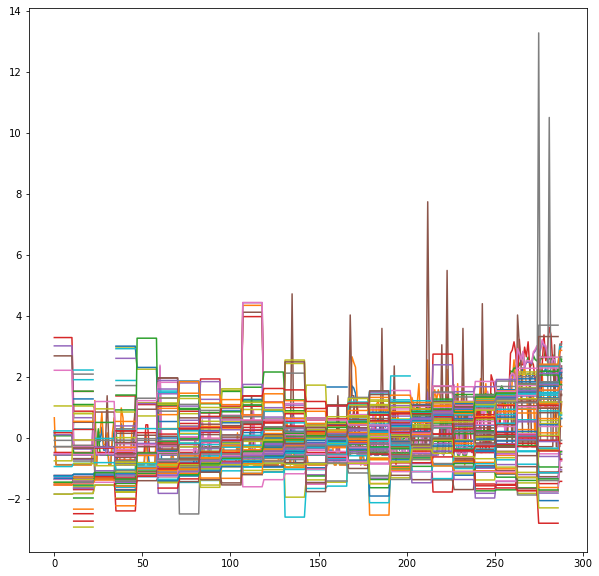

In [8]:
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X))

X2[X2.columns[:]].plot(figsize=(10,10), legend = False)


In [9]:
X_diff = X - X.shift(1)
X_diff = pd.DataFrame(scaler.fit_transform(X_diff))

<AxesSubplot:>

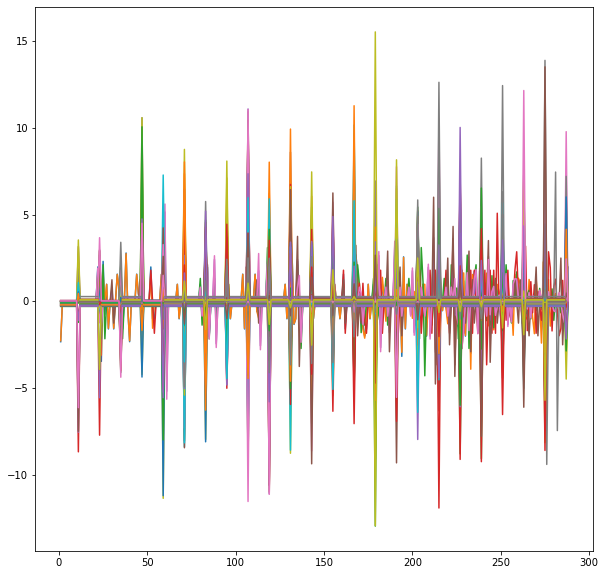

In [10]:
X_diff[X_diff.columns[:]].plot(figsize=(10,10), legend=False)

## Investigation of UKR outlier - Overdifferencing?

In [11]:
TARGET_VARIABLE = "SUM(FATALITIES)"
TARGET_COUNTRY = "UKR"
SEASONAL_PERIODICITY = 12 # for data frequency & seasonality S

SEASONALITY = True
NEIGHBORS = True
SOCIO_ECO_VARS = True # X
N_LAGS_X = 1
DIM_REDUCTION_METHOD = "PCA"

In [12]:
### GET DATA
y, X = getData(target_variable = TARGET_VARIABLE, 
               target_country = TARGET_COUNTRY, 
               predictor_countries = [],
               socio_eco_vars = SOCIO_ECO_VARS,
               n_lags_X = N_LAGS_X, 
               seasonal_periodicity = SEASONAL_PERIODICITY)

Getting Data for UKR
IMF, WB, ACLED loaded
adjusting y for lags
adjusting X for lags
GET DATA finished.
X: (50, 94)
y: (50, 1)
------------------------------------------------


In [13]:
# create a set of sarima configs to try
PARAM_GRID = list()
# parameter options to try

### PCA
if NEIGHBORS or SOCIO_ECO_VARS:
    n_components = range(0, 4)
else:
    n_components = [0]

### ARMA
p_params = range(3) # AR 3
d_params = range(1) # Differencing 3
q_params = range(3) # MA 3

### SEASONALITY
if SEASONALITY:
    P_params = range(3) # 5
    D_params = range(1) # 2
    Q_params = range(2) # 2
    
    ### TREND
    # t_params = ['n','c','t','ct'] # Form of Trend
    t_params = ['n', 't', 'ct'] # Form of Trend

    ### SEASONAL PERIODICITY
    m_params = [SEASONAL_PERIODICITY]   
else:
    P_params = [0]
    D_params = [0]
    Q_params = [0]

    ### TREND
    t_params = ["n"] # Form of Trend

    ### SEASONAL PERIODICITY
    m_params = [0] 

for n in n_components:
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for P in P_params:
                    for D in D_params:
                        for Q in Q_params:
                            for m in m_params:
                                for t in t_params:
                                    cfg = [n, (p, d, q), (P, D, Q, m), t]
                                    PARAM_GRID.append(cfg)
len(PARAM_GRID)    

648

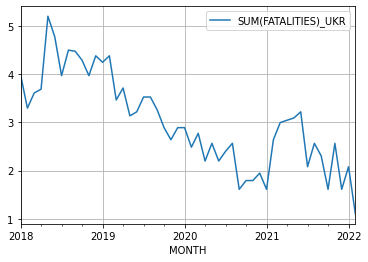

In [14]:
y.plot()
plt.grid()

First difference: 
$$(y_t - y_{t-1}) = \epsilon_t \newline
y_{t,d=1} = y_{t-1} $$

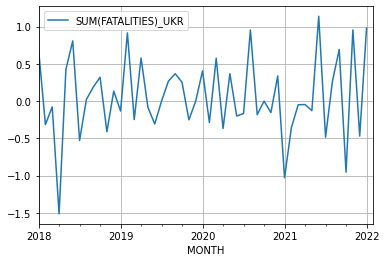

In [15]:
y_d1 = y - y.shift(-1)
y_d1.plot()
plt.grid()

Second difference: 
$$(y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = \epsilon_t \newline
y_{t,d=2} = 2 \times y_{t-1} - y_{t-2}$$

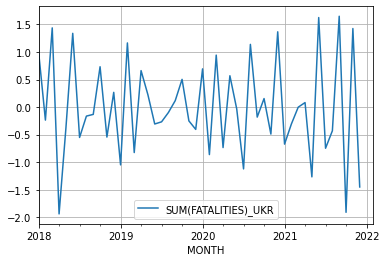

In [16]:
y_d2 = y - 2*y.shift(-1) + y.shift(-2)
y_d2.plot()
plt.grid()

#### UKR Manual Forecast based on 2nd difference with ARIMA(0,2,0)

In [17]:
y_pred = list(y_d2.iloc[:-2, 0])
# print(y_pred)

for t in range(len(y_pred), len(y_pred)+12):
#     print(t, y_pred[t-1], y_pred[t-2])
    y_pred.append(2 * y_pred[t-1] - y_pred[t-2])
# y_pred

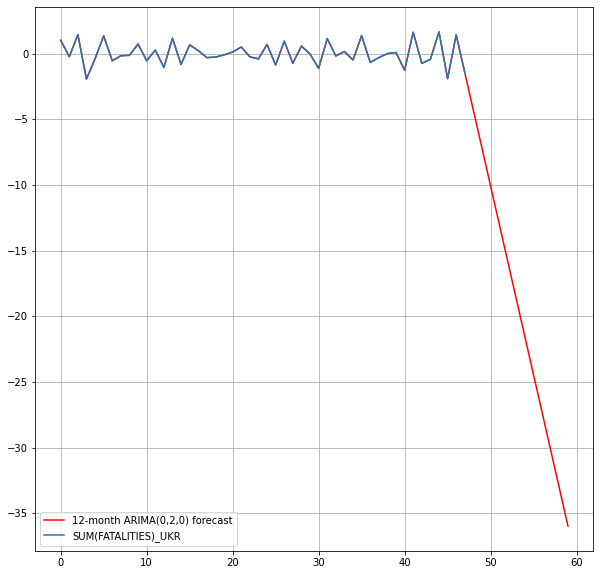

In [18]:
y_pred = pd.DataFrame(y_pred, columns=["12-month ARIMA(0,2,0) forecast"])

fig, ax = plt.subplots(1, figsize=(10,10))

y_pred.plot(color="r", ax=ax)
y_d2.reset_index().plot(ax=ax)
plt.grid()

In [19]:
y_pred

,"12-month ARIMA(0,2,0) forecast"
0,1.008228
1,-0.237120
2,1.437166
3,-1.940010
4,-0.383948
5,1.338349
6,-0.551991
7,-0.164405
8,-0.133290
9,0.731902


### Fourier Transform to detect seasonal periodicity

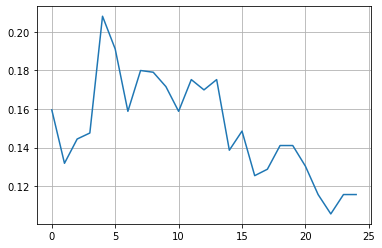

In [20]:
N = len(y)
# sample spacing
# T = 1.0 / 800.0

# Perform Fourier transform using scipy
from scipy import fftpack
y_fft = fftpack.fft(y)


import matplotlib.pyplot as plt
plt.plot(2.0/N * np.abs(y_fft[0:N//2]))
plt.grid()
plt.show()

In [21]:
acled_monthly_adm0_piv = pd.read_csv("../data/TB012_ACLED_QUARTERLY_ADM0_LOG.csv")

In [22]:
vars = [x[:-4] for x in acled_monthly_adm0_piv.columns[1:]]
vars = set(vars)
vars

{'NUMBER_EVENTS',
 'SUM(COUNT_PRO)',
 'SUM(COUNT_SRZ)',
 'SUM(COUNT_STRA)',
 'SUM(FATALITIES)',
 'SUM(FATALITIES_PRO)',
 'SUM(FATALITIES_SRZ)',
 'SUM(FATALITIES_STRA)'}

### Ukraine X Analysis 

In [23]:
TARGET_VARIABLE = "SUM(FATALITIES)"
TARGET_COUNTRY = "UKR"
SEASONAL_PERIODICITY = 12 # for data frequency & seasonality S

SEASONALITY = False
NEIGHBORS = True
SOCIO_ECO_VARS = True # X
N_LAGS_X = 1
DIM_REDUCTION_METHOD = "PCA"

In [24]:
# create a set of sarima configs to try
PARAM_GRID = list()
# parameter options to try

### PCA
if NEIGHBORS or SOCIO_ECO_VARS:
    n_components = range(0, 4)
else:
    n_components = [0]

### ARMA
p_params = range(1) # AR 3
d_params = range(1) # Differencing 3
q_params = range(1) # MA 3

### SEASONALITY
if SEASONALITY:
    P_params = range(1) # 5
    D_params = range(1) # 2
    Q_params = range(1) # 2
    
    ### TREND
    # t_params = ['n','c','t','ct'] # Form of Trend
    t_params = ['n'] # Form of Trend

    ### SEASONAL PERIODICITY
    m_params = [SEASONAL_PERIODICITY]   
else:
    P_params = [0]
    D_params = [0]
    Q_params = [0]

    ### TREND
    t_params = ["n"] # Form of Trend

    ### SEASONAL PERIODICITY
    m_params = [0] 

for n in n_components:
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for P in P_params:
                    for D in D_params:
                        for Q in Q_params:
                            for m in m_params:
                                for t in t_params:
                                    cfg = [n, (p, d, q), (P, D, Q, m), t]
                                    PARAM_GRID.append(cfg)
len(PARAM_GRID)    

4

In [25]:
### GET DATA
y, X = getData(target_variable = TARGET_VARIABLE, 
               target_country = TARGET_COUNTRY, 
               socio_eco_vars = SOCIO_ECO_VARS,
               n_lags_X = N_LAGS_X, 
               seasonal_periodicity = SEASONAL_PERIODICITY)

Getting Data for UKR
IMF, WB, ACLED loaded
adjusting y for lags
adjusting X for lags
GET DATA finished.
X: (50, 102)
y: (50, 1)
------------------------------------------------


In [26]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


Training started.
Start GRIDSEARCH CV on 8 CPU cores:
4 parameter combinations are tested.


  0%|          | 0/4 [00:00<?, ?it/s]

PREDICTION#################################
         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2019-02               4.304065                2.833213   
2019-03               4.219508                2.197225   
2019-04               4.624973                3.091042   
2019-05               4.442651                3.367296   
2019-06               4.262680                2.708050   
2019-07               4.356709                1.386294   
2019-08               4.127134                2.302585   
2019-09               4.110874                2.302585   
2019-10               4.406719                2.397895   
2019-11               4.094345                0.693147   
2019-12               4.189655                2.302585   
2020-01               4.442651                2.197225   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2019-02                

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02               4.143135                2.197225   
2020-03               4.510860                3.091042   
2020-04               4.418841                2.079442   
2020-05               4.605170                1.945910   
2020-06               4.234107                2.079442   
2020-07               4.499810                2.397895   
2020-08               4.369448                2.197225   
2020-09               4.394449                2.079442   
2020-10               4.025352                1.609438   
2020-11               3.891820                1.609438   
2020-12               3.761200                1.945910   
2021-01               4.343805                1.609438   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                3.970292                 1.098612   
2020-03

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2019-02                    NaN                     NaN   
2019-03                    NaN                     NaN   
2019-04                    NaN                     NaN   
2019-05                    NaN                     NaN   
2019-06                    NaN                     NaN   
2019-07                    NaN                     NaN   
2019-08                    NaN                     NaN   
2019-09                    NaN                     NaN   
2019-10                    NaN                     NaN   
2019-11                    NaN                     NaN   
2019-12                    NaN                     NaN   
2020-01                    NaN                     NaN   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2019-02                     NaN                      NaN   
2019-03

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02               4.143135                2.197225   
2020-03               4.510860                3.091042   
2020-04               4.418841                2.079442   
2020-05               4.605170                1.945910   
2020-06               4.234107                2.079442   
2020-07               4.499810                2.397895   
2020-08               4.369448                2.197225   
2020-09               4.394449                2.079442   
2020-10               4.025352                1.609438   
2020-11               3.891820                1.609438   
2020-12               3.761200                1.945910   
2021-01               4.343805                1.609438   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                3.970292                 1.098612   
2020-03

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02                    NaN                     NaN   
2020-03                    NaN                     NaN   
2020-04                    NaN                     NaN   
2020-05                    NaN                     NaN   
2020-06                    NaN                     NaN   
2020-07                    NaN                     NaN   
2020-08                    NaN                     NaN   
2020-09                    NaN                     NaN   
2020-10                    NaN                     NaN   
2020-11                    NaN                     NaN   
2020-12                    NaN                     NaN   
2021-01                    NaN                     NaN   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                     NaN                      NaN   
2020-03

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2019-02               4.304065                2.833213   
2019-03               4.219508                2.197225   
2019-04               4.624973                3.091042   
2019-05               4.442651                3.367296   
2019-06               4.262680                2.708050   
2019-07               4.356709                1.386294   
2019-08               4.127134                2.302585   
2019-09               4.110874                2.302585   
2019-10               4.406719                2.397895   
2019-11               4.094345                0.693147   
2019-12               4.189655                2.302585   
2020-01               4.442651                2.197225   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2019-02                3.737670                 2.833213   
2019-03

PREDICTION#################################
         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02               4.143135                2.197225   
2020-03               4.510860                3.091042   
2020-04               4.418841                2.079442   
2020-05               4.605170                1.945910   
2020-06               4.234107                2.079442   
2020-07               4.499810                2.397895   
2020-08               4.369448                2.197225   
2020-09               4.394449                2.079442   
2020-10               4.025352                1.609438   
2020-11               3.891820                1.609438   
2020-12               3.761200                1.945910   
2021-01               4.343805                1.609438   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02                    NaN                     NaN   
2020-03                    NaN                     NaN   
2020-04                    NaN                     NaN   
2020-05                    NaN                     NaN   
2020-06                    NaN                     NaN   
2020-07                    NaN                     NaN   
2020-08                    NaN                     NaN   
2020-09                    NaN                     NaN   
2020-10                    NaN                     NaN   
2020-11                    NaN                     NaN   
2020-12                    NaN                     NaN   
2021-01                    NaN                     NaN   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                     NaN                      NaN   
2020-03

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2019-02               4.304065                2.833213   
2019-03               4.219508                2.197225   
2019-04               4.624973                3.091042   
2019-05               4.442651                3.367296   
2019-06               4.262680                2.708050   
2019-07               4.356709                1.386294   
2019-08               4.127134                2.302585   
2019-09               4.110874                2.302585   
2019-10               4.406719                2.397895   
2019-11               4.094345                0.693147   
2019-12               4.189655                2.302585   
2020-01               4.442651                2.197225   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2019-02                3.737670                 2.833213   
2019-03

PREDICTION#################################
         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02               4.143135                2.197225   
2020-03               4.510860                3.091042   
2020-04               4.418841                2.079442   
2020-05               4.605170                1.945910   
2020-06               4.234107                2.079442   
2020-07               4.499810                2.397895   
2020-08               4.369448                2.197225   
2020-09               4.394449                2.079442   
2020-10               4.025352                1.609438   
2020-11               3.891820                1.609438   
2020-12               3.761200                1.945910   
2021-01               4.343805                1.609438   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2020-02                    NaN                     NaN   
2020-03                    NaN                     NaN   
2020-04                    NaN                     NaN   
2020-05                    NaN                     NaN   
2020-06                    NaN                     NaN   
2020-07                    NaN                     NaN   
2020-08                    NaN                     NaN   
2020-09                    NaN                     NaN   
2020-10                    NaN                     NaN   
2020-11                    NaN                     NaN   
2020-12                    NaN                     NaN   
2021-01                    NaN                     NaN   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2020-02                     NaN                      NaN   
2020-03



Best CV-Results
{'params': [1, (0, 0, 0), (0, 0, 0, 0), 'n'], 'cv_score': 2.8657896617451257, 'fold_results': [3.570909037923478, 2.160670285566774]}
Training finished.
Evaluation started.
PREDICTION#################################
         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2021-03               4.262680                2.639057   
2021-04               4.672829                2.484907   
2021-05               5.176150                3.258097   
2021-06               5.111988                2.484907   
2021-07               5.257495                3.761200   
2021-08               5.056246                2.833213   
2021-09               4.962845                2.397895   
2021-10               5.568345                2.302585   
2021-11               5.293305                3.610918   
2021-12               5.438079                2.484907   
2022-01               5.501258                3.091042   
2022-02    

         NUMBER_EVENTS_BFA_T-1  SUM(COUNT_PRO)_BFA_T-1  \
MONTH                                                    
2021-03                    NaN                     NaN   
2021-04                    NaN                     NaN   
2021-05                    NaN                     NaN   
2021-06                    NaN                     NaN   
2021-07                    NaN                     NaN   
2021-08                    NaN                     NaN   
2021-09                    NaN                     NaN   
2021-10                    NaN                     NaN   
2021-11                    NaN                     NaN   
2021-12                    NaN                     NaN   
2022-01                    NaN                     NaN   
2022-02                    NaN                     NaN   

         SUM(COUNT_SRZ)_BFA_T-1  SUM(COUNT_STRA)_BFA_T-1  \
MONTH                                                      
2021-03                     NaN                      NaN   
2021-04

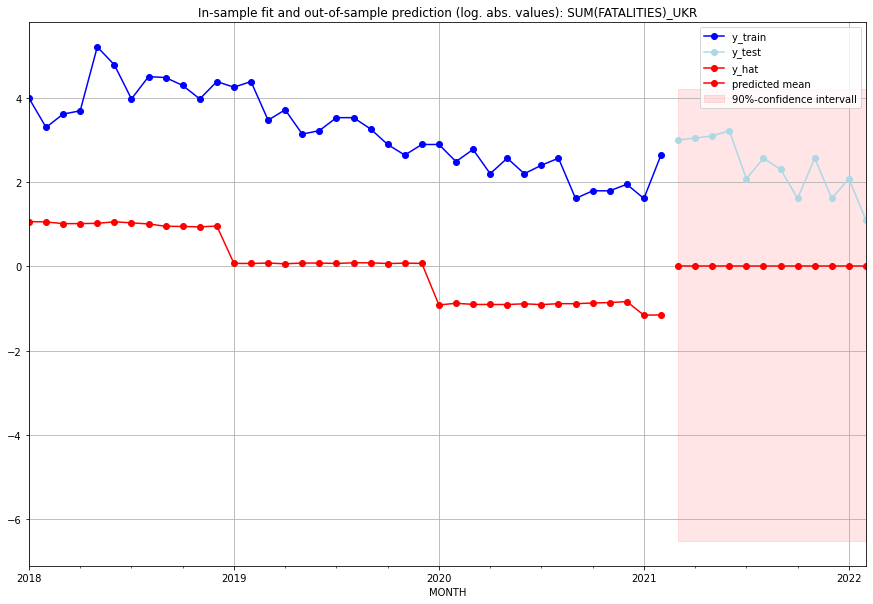

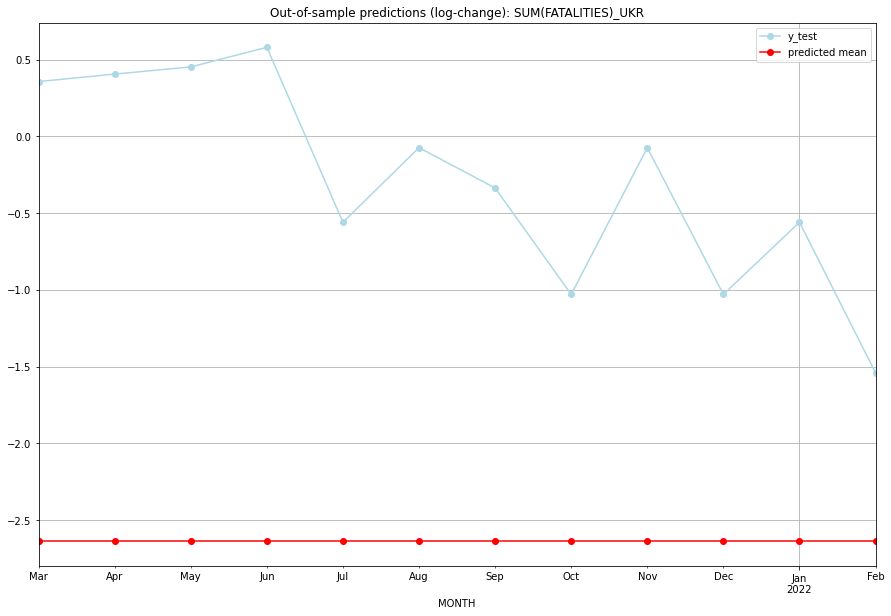

TADDA: 3.2346047760648386
Evaluation finished.


In [27]:
### SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(y=y,
                                                    X=X, 
                                                    forecast_horizon=SEASONAL_PERIODICITY)

### TRAINING WITH GRIDSEARCHCV
gscv = GridSearchCV(param_grid = PARAM_GRID,
                    forecaster = TimeSeriesForecasterPCA_LinInt)
training_res = gscv.train(X_train, y_train)
prediction_results = gscv.evaluate_model(X_test, y_test, fh = SEASONAL_PERIODICITY)

In [28]:
large_cols = X_train.apply(lambda x:  any(x > 1000))
large_cols = X_train.columns[large_cols]

### Extract most dominant frequency from time series

In [29]:
### GET DATA
y, X = getData(target_variable = TARGET_VARIABLE, 
               target_country = "MLI", 
               socio_eco_vars = SOCIO_ECO_VARS,
               n_lags_X = N_LAGS_X, 
               seasonal_periodicity = SEASONAL_PERIODICITY)

Getting Data for MLI
IMF, WB, ACLED loaded
adjusting y for lags
adjusting X for lags
GET DATA finished.
X: (301, 99)
y: (301, 1)
------------------------------------------------


In [30]:
from scipy import signal

# Estimate power spectral density using a periodogram
f, Pxx = signal.periodogram(y.values.flatten())

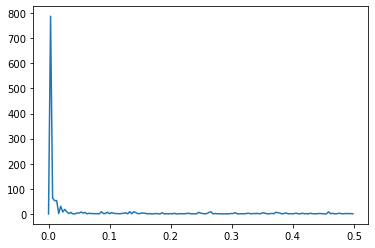

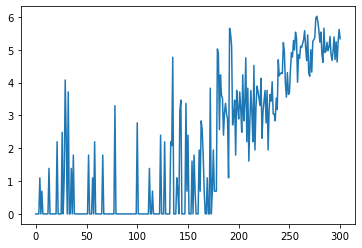

[301.   150.5   75.25]


In [31]:
# lets plot this periodogram
plt.plot(f, Pxx)
plt.show()
plt.plot(y.values)
plt.show()

top_3_periods = {}

# get indices for 3 highest Pxx values
top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f[top3_freq_indices]
# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)
# periods = int(round(periods, 0))
print(periods)

### Correct SARIMAX.csv

In [32]:
MODEL_NAME = "S-VARIMAX_MONTHLY"

sarimax = pd.read_csv("../data/"+MODEL_NAME+"_PREDICTIONS.csv")
sarimax.info()

FileNotFoundError: [Errno 2] No such file or directory: '../data/S-VARIMAX_MONTHLY_PREDICTIONS.csv'

In [ ]:
sarimax = sarimax[sarimax["MONTH"] != "MONTH"]

In [ ]:
# sarimax.to_csv("../data/"+MODEL_NAME+"_PREDICTIONS.csv", index=False)

### Get SARIMAX state space matrices

In [ ]:
[1]*3

In [ ]:
### GET DATA
y, X = getData(target_variable = TARGET_VARIABLE, 
               target_country = "MLI", 
               socio_eco_vars = SOCIO_ECO_VARS,
               n_lags_X = N_LAGS_X, 
               seasonal_periodicity = SEASONAL_PERIODICITY)

In [ ]:
### SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(y=y,
                                                    X=X, 
                                                    forecast_horizon=SEASONAL_PERIODICITY)


In [ ]:
forecaster = TimeSeriesForecasterPCA_LinInt()
forecaster.fit(X_train, y_train, (5, (1,1,1), (1,1,1,12), "n"))

In [ ]:
design = forecaster.fitted_model.model.initial_design
pd.DataFrame(design)

In [ ]:
print(forecaster.fitted_model.model.initial_transition.shape)
forecaster.fitted_model.model.initial_transition

In [ ]:
forecaster.fitted_model.model.initial_state_intercept

In [ ]:
forecaster.fitted_model.model.initial_selection

In [ ]:
forecaster.fitted_model.model.initial_variance

In [ ]:
forecaster.fitted_model.model.param_terms

In [ ]:
forecaster.fitted_model.model.start_params

In [ ]:
forecaster.fitted_model.model.param_names

In [ ]:
forecaster.fitted_model.polynomial_seasonal_ar

In [ ]:
forecaster.fitted_model.polynomial_trend